# Import Library

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Kode di atas bertujuan untuk melakukan impor library yang digunakan dalam proyek ini, seperti pandas untuk membuat dataframe, numpy untuk melakukan proses aritmatika, scikit-learn digunakan untuk data split dan menghitung similarity.

# Data Load

In [6]:
#Data Loading
movies_df = pd.read_csv('/kaggle/input/movie-recommendation-system/movies.csv')
ratings_df = pd.read_csv('/kaggle/input/movie-recommendation-system/ratings.csv')

Kode di atas bertujuan untuk membuat dataframe `movies_df` dan `ratings_df` dengan membaca file CSV yang ada.

In [7]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Kode di atas bertujuan untuk mengetahui isi dari dataframe `movies_df` untuk mengecek apakah dataframe yang ada sudah sesuai.

In [8]:
ratings_df = ratings_df.sample(n=200000, random_state=42)
ratings_df.head()

,userId,movieId,rating,timestamp
15347762,99476,104374,3.5,1467897440
16647840,107979,2634,4.0,994007728
23915192,155372,1614,3.0,1097887531
10052313,65225,7153,4.0,1201382275
12214125,79161,500,5.0,1488915363


Kode di atas bertujuan untuk mengetahui isi dari dataframe `ratings_df` untuk mengecek apakah dataframe yang ada sudah sesuai. Selain itu, kita hanya akan mengambil sample sebanyak 200.000 data dikarenakan apabila kita memakai keseluruhan data sebanyak 250.000.000, maka akan memakan banyak waktu dan penyimpnanan sehingga proses pengembangan model sistem rekomendasi akan sangat tidak optimal.

# Data Understanding

In [9]:
# Struktur dataframe movies
movies_row = movies_df.shape[0]
movies_column = movies_df.shape[1]

# Struktur dataframe ratings
ratings_row = ratings_df.shape[0]
ratings_column = ratings_df.shape[1]

print('Dataframe Movies memiliki', movies_row, 'baris dan', movies_column, 'kolom')
print('Dataframe Ratings memiliki', ratings_row, 'baris dan', ratings_column, 'kolom')

Dataframe Movies memiliki 62423 baris dan 3 kolom
Dataframe Ratings memiliki 200000 baris dan 4 kolom


Kode di atas bertujuan untuk mengetahui jumlah baris dan kolom pada masing-masing dataset.

Insight:
- Dataset `movies_df` memiliki 62423 baris dan 3 kolom.
- Dataset `ratings_df` memiliki 200.000 baris dan 4 kolom.

In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


Kode di atas bertujuan untuk mengetahui beberapa informasi pada tiap kolom yang ada pada dataset `movies_df` seperti Non-Null count dan tipe data.

In [11]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 15347762 to 14282133
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     200000 non-null  int64  
 1   movieId    200000 non-null  int64  
 2   rating     200000 non-null  float64
 3   timestamp  200000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 7.6 MB


Kode di atas bertujuan untuk mengetahui beberapa informasi pada tiap kolom yang ada pada dataset `ratings_df` seperti Non-Null count dan tipe data.

In [12]:
print('Jumlah pengguna:', len(ratings_df['userId'].unique()))

Jumlah pengguna: 80869


Kode di atas bertujuan untuk mengetahui jumlah pengguna yang ada pada dataset `ratings_df`

Insight: Terdapat 80.869 pengguna pada dataset `ratings_df`

In [13]:
print('Jumlah missing values:\n', movies_df.isna().sum())
print('Jumlah duplikasi data:', movies_df.duplicated().sum())

Jumlah missing values:
 movieId    0
title      0
genres     0
dtype: int64
Jumlah duplikasi data: 0


Kode di atas bertujuan untuk mengecek missing values dan duplikasi data.

Insight: Tidak ada data duplikasi dan missing values pada dataset `movies_df`.

In [14]:
print('Jumlah missing values:\n', ratings_df.isna().sum())
print('Jumlah duplikasi data:', ratings_df.duplicated().sum())

Jumlah missing values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Jumlah duplikasi data: 0


Kode di atas bertujuan untuk mengecek missing values dan duplikasi data.

Insight: Tidak ada data duplikasi dan missing values pada dataset `ratings_df`.

In [15]:
movies_df['genres'].value_counts().sort_index()

genres
(no genres listed)                     5062
Action                                  562
Action|Adventure                        200
Action|Adventure|Animation               30
Action|Adventure|Animation|Children       6
                                       ... 
Thriller|War                             13
Thriller|Western                          5
War                                      89
War|Western                               7
Western                                 560
Name: count, Length: 1639, dtype: int64

Kode di atas bertujuan untuk mengetahui berbagai macam `genres` yang ada pada dataframe `movies_df`

Insight: Terdapat 1639 macam genre pada dataset `movies_df`

## Exploratory Data Analysis (EDA)

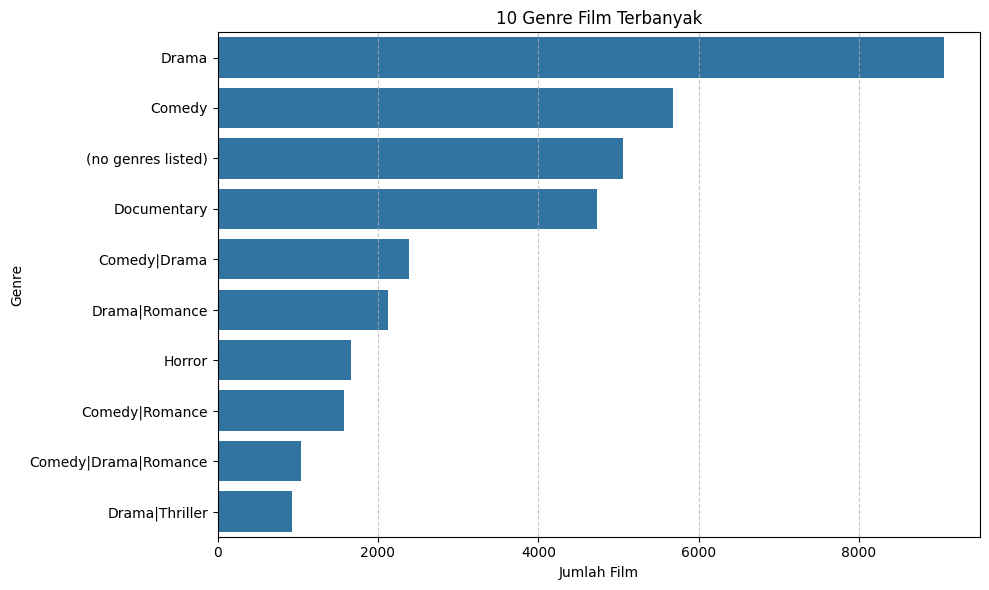

In [16]:
top_genres = movies_df['genres'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("10 Genre Film Terbanyak")
plt.xlabel("Jumlah Film")
plt.ylabel("Genre")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Kode di atas bertujuan untuk mengetahui distribusi 10 genre film terbanyak pada dataset.

Insight: Genre Drama menjadi genre dengan film terbanyak dengan jumlah lebih dari 8000 film.

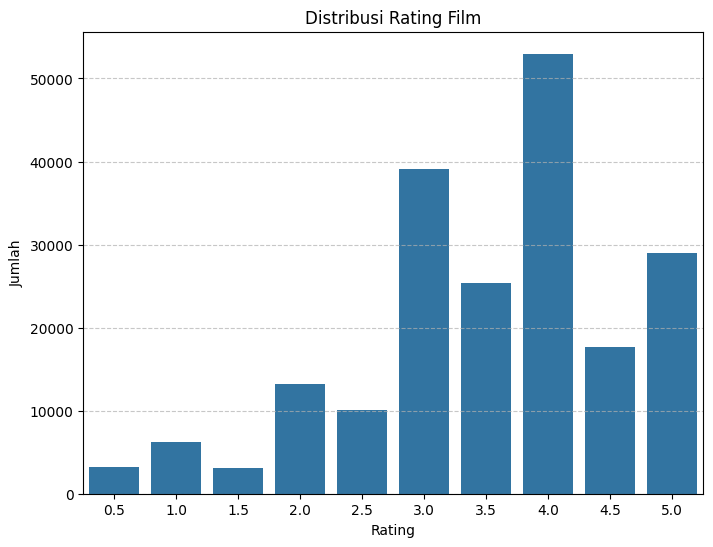

In [17]:
rating_counts = ratings_df['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index.astype(str), y=rating_counts.values)
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Kode di atas berutujuan untuk menganalisa distribusi rating film pada dataset yang ada.

Insight: Rating 4.0 menjadi rating terbanyak yang diberikan oleh pengguna dengan lebih dari 50.000 film.

# Data Preparation

In [18]:
movies_df = movies_df[movies_df['genres'] != "(no genres listed)"]

Kode di atas bertujuan untuk membersihkan data film dengan genre berjenis (no genres listed). Hal ini menandakan bahwa film dengan (no genres listed) tidak memiliki genres dan dapat menjadi tantangan dalam merekomendasikan film yang sesuai kepada pengguna.

In [19]:
df = pd.merge(ratings_df, movies_df, on='movieId')
df = df.drop(['timestamp'], axis=1)

Kode di atas bertujuan untuk menggabungkan dataset `movies_df` dan `ratings_df` berdasar kepada kesamaan `movieId`. Hal ini bertujuan agar dataset bisa lebih relevan saat digunakan sebagai train set dan data set dalam membangun model rekomendasi.

In [20]:
df.head()

,userId,movieId,rating,title,genres
0,99476,104374,3.5,About Time (2013),Drama|Fantasy|Romance
1,107979,2634,4.0,"Mummy, The (1959)",Horror
2,155372,1614,3.0,In & Out (1997),Comedy
3,65225,7153,4.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
4,79161,500,5.0,Mrs. Doubtfire (1993),Comedy|Drama


Kode di atas bertujuan untuk melakukan pengecekan apakah dataframe `df` telah memiliki data yang benar dan sesuai.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199782 entries, 0 to 199781
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   199782 non-null  int64  
 1   movieId  199782 non-null  int64  
 2   rating   199782 non-null  float64
 3   title    199782 non-null  object 
 4   genres   199782 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


Kode di atas bertujuan untuk melakukan pengecekan tipe data dan jumlah value pada setiap kolom dataframe `df`.

In [22]:
user_item_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_matrix = train_data.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

Terdapat beberapa tujuan dari kode yang dicantumkan pada proses di atas, yaitu:
- Membuat user-item matrix dari DataFrame df, di mana baris adalah userId, kolom adalah movieId, dan nilai adalah rating yang diberikan user terhadap film.
- Matrix ini akan digunakan sebagai dasar sistem rekomendasi berbasis kolaboratif.
- Membagi dataset df menjadi training set (80%) dan testing set (20%) secara acak namun konsisten karena menggunakan random_state=42.
- Membuat user-item matrix khusus dari data training, kemudian mengisi nilai yang kosong (NaN) dengan 0.
- Ini dilakukan agar matrix bisa digunakan dalam model seperti Collaborative Filtering berbasis matriks (misal cosine similarity atau matrix factorization).

In [23]:
movies_df['genres'] = movies_df['genres'].str.split('|')
genre_dummies = movies_df['genres'].explode().str.get_dummies().groupby(level=0).sum()

movies_with_genres = pd.concat([movies_df[['movieId', 'title']], genre_dummies], axis=1)

Berikut adalah beberapa proses yang dilakukan pada kode di atas:
- Mengubah kolom genres yang awalnya berupa string (misalnya: "Action|Comedy") menjadi list (misalnya: ["Action", "Comedy"]), dipisahkan berdasarkan tanda |.
- explode() memecah list genre menjadi baris terpisah (satu genre per baris).
- str.get_dummies() mengubah genre menjadi kolom biner (one-hot encoding).
- groupby(level=0).sum() menggabungkan kembali ke level baris asal (movieId), sehingga setiap film diwakili oleh vektor genre (misalnya: Action=1, Comedy=1, lainnya=0).
- Menggabungkan kembali kolom movieId dan title dengan vektor genre hasil one-hot encoding untuk membentuk movies_with_genres.

# Modeling

## Collaborative Filtering

In [24]:
user_similarity = cosine_similarity(train_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=train_matrix.index, columns=train_matrix.index)

Kode di atas bertujuan untuk untuk mengukur kesamaan antara user satu dengan lainnya menggunakan Cosine Similarity. Output-nya berupa matriks kemiripan antar pengguna.

In [25]:
def recommendation_by_user(user_id, top_n=10):
    if user_id not in train_matrix.index:
        return pd.DataFrame(columns=['movieId', 'title', 'genres'])

    # Ambil skor kemiripan user
    sim_users = user_similarity_df[user_id].drop(user_id).sort_values(ascending=False)

    # Weighted sum of ratings
    weighted_sum = np.dot(sim_users.values, train_matrix.loc[sim_users.index].values)
    sim_sum = np.sum(np.abs(sim_users.values))

    if sim_sum == 0:
        predicted_ratings = weighted_sum
    else:
        predicted_ratings = weighted_sum / sim_sum

    # Hindari film yang sudah ditonton user
    user_seen = train_matrix.loc[user_id] > 0
    predicted_ratings[user_seen.values] = -np.inf

    # Ambil movieId rekomendasi teratas
    recommended_indices = np.argsort(predicted_ratings)[-top_n:][::-1]
    recommended_movie_ids = train_matrix.columns[recommended_indices]

    # Ambil informasi judul dan genre dari movies_df
    recommendations = movies_df[movies_df['movieId'].isin(recommended_movie_ids)].copy()

    # Jaga urutan sesuai prediksi
    recommendations['rank'] = recommendations['movieId'].apply(lambda x: recommended_movie_ids.get_loc(x))
    recommendations = recommendations.sort_values('rank').drop(columns='rank')

    return recommendations[['movieId', 'title', 'genres']]

Beberapa proses yang dilakukan dalam fungsi `recommendation_by_user()` di atas adalah sebagai berikut:
- Cek apakah user ada dalam data training untuk menghindari error jika user tidak ditemukan
- Mengambil daftar user lain yang paling mirip (kecuali dirinya sendiri), diurutkan dari yang paling mirip.
- Menggabungkan rating dari user-user lain, diberi bobot berdasarkan kemiripannya dengan user target.
- Jika total similarity sim_sum = 0, artinya tidak ada kemiripan, maka langsung gunakan weighted_sum saja.
- Menghindari film yang sudah ditonton untuk mencegah sistem merekomendasikan film yang sudah ditonton user.
- Ambil indeks dengan nilai prediksi rating tertinggi (Top-N) kemudian konversi indeks ke movieId.
- Menggabungkan rekomendasi dengan metadata film (judul dan genre).
- Menjaga urutan rekomendasi agar sesuai dengan prediksi rating tertinggi.

## Content-Based Filtering

In [26]:
genre_similarity_matrix = cosine_similarity(genre_dummies)
genre_sim_df = pd.DataFrame(genre_similarity_matrix,
                            index=movies_df['movieId'],
                            columns=movies_df['movieId'])

Kode di atas bertujuan untuk menghitung seberapa mirip dua film berdasarkan genre menggunakan cosine similarity. Matriks genre_sim_df memiliki indeks dan kolom berupa movieId, dan nilainya adalah skor kemiripan antar film.

In [27]:
def recommendation_by_genre(user_id, ratings_df, top_n=10):
    # Ambil movieId yang pernah diberi rating oleh user
    user_rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()

    if not user_rated_movies:
        return pd.DataFrame(columns=['movieId', 'title', 'genres'])

    # Pastikan kolom 'genres' tidak kosong dan tipe string
    movie_genres = movies_df[movies_df['movieId'].isin(user_rated_movies)].copy()
    movie_genres['genres'] = movie_genres['genres'].fillna('').astype(str)
    
    # Ambil genre dari film yang telah dirating user
    user_genres = movie_genres['genres'].str.split('|')
    all_genres = [genre for sublist in user_genres for genre in sublist]
    favorite_genres = pd.Series(all_genres).value_counts().index.tolist()

    # Ambil film yang belum dirating user
    unrated_movies = movies_df[~movies_df['movieId'].isin(user_rated_movies)].copy()
    unrated_movies['genres'] = unrated_movies['genres'].fillna('').astype(str)

    # Skor kemiripan berdasarkan jumlah genre yang cocok
    def genre_score(genres):
        genres_set = set(genres.split('|')) if isinstance(genres, str) else set()
        return len(genres_set & set(favorite_genres))

    unrated_movies['genre_score'] = unrated_movies['genres'].apply(genre_score)
    recommendations = unrated_movies.sort_values(by='genre_score', ascending=False).head(top_n)

    return recommendations[['movieId', 'title', 'genres']]

Beberapa proses yang dilakukan dalam fungsi `recommendation_by_genre()` di atas adalah sebagai berikut:
- Mengidentifikasi film apa saja yang pernah ditonton atau dirating oleh user.
- Mengambil genre dari film-film yang ditonton user.
- Kemudian dikompilasi semua genre menjadi list, dan diurutkan berdasarkan frekuensi kemunculan guna membentuk genre favorit user berdasarkan film yang telah dia tonton.
- Menyaring hanya film yang belum pernah ditonton oleh user.
- Hitung skor kemiripan genre dengan setiap film yang belum ditonton, dihitung jumlah genre yang cocok dengan genre favorit user. Semakin banyak genre yang cocok → skor semakin tinggi.
- Film dengan genre paling mirip dengan preferensi user akan direkomendasikan.

# Evaluation

## Collaborative Filtering Evaluation

In [86]:
def evaluate_user_recommendation(user_id, train_df, test_df, k=10):
    # Ambil movieId aktual dari test set yang diberi rating ≥ 3
    actual_items = test_df[(test_df['userId'] == user_id) & (test_df['rating'] >= 3)]['movieId'].tolist()

    if not actual_items:
        print(f"[SKIP] User {user_id} tidak memiliki data rating ≥ 3 di test set.")
        return None

    # Ambil rekomendasi user
    recommended_df = recommendation_by_user(user_id, top_n=k)
    recommended_items = recommended_df['movieId'].tolist()

    if not recommended_items:
        print(f"[SKIP] Tidak ada rekomendasi untuk user {user_id}.")
        return None

    # Precision@K = |relevant ∩ recommended| / k
    precision = len(set(actual_items) & set(recommended_items)) / k

    print(f"User {user_id} | Precision@{k}: {precision:.4f}")
    print(f"Actual Items:      {actual_items}")
    print(f"Recommended Items: {recommended_items}")
    return precision

def evaluate_users(user_ids, train_df, test_df, k=10):
    precision_scores = []

    for user_id in user_ids:
        score = evaluate_user_recommendation(user_id, train_df, test_df, k)
        if score is not None:
            precision_scores.append(score)

    if precision_scores:
        avg_precision = np.mean(precision_scores)
        print(f"\nAverage Precision@{k} for {len(precision_scores)} users: {avg_precision:.4f}")
        return avg_precision
    else:
        print("Tidak ada user yang valid untuk evaluasi.")
        return 0

Beberapa tahapan proses yang dilakukan pada fungsi `evaluate_user_recommendation()` di atas adalah sebagai berikut:
- Mengambil daftar film yang user beri rating ≥ 3 (dianggap disukai user) dari test set. Ini adalah ground truth (jawaban sebenarnya). Jika user tidak memiliki data valid, dilewati.
- Mengambil daftar top-k film rekomendasi berdasarkan Collaborative Filtering.
- Menghitung Precision@K dengan Precision@K = jumlah film relevan yang direkomendasikan dibagi total rekomendasi (k). Hanya mempertimbangkan rekomendasi yang benar-benar disukai user di test set.
- Terakhir, menampilkan hasil evaluasi per user.

Sedangkan pada fungsi `evaluate_users()` bertujuan untuk mengevaluasi beberapa user sekaligus. Terdapat beberapa tahapan yang dilakukan, seperti:
- Fungsi evaluate_user_recommendation() dipanggil untuk tiap user.
- Hanya memasukkan user yang memiliki data valid.
- Menghitung dan dan menampilkan Average Precision. 

In [131]:
# Daftar user ID untuk evaluasi
sample_users = test_data['userId'].unique()
user_test = np.random.choice(sample_users, size=5, replace=False)

# Evaluasi
evaluate_users(user_test, train_data, test_data)

[SKIP] User 61835 tidak memiliki data rating ≥ 3 di test set.
[SKIP] Tidak ada rekomendasi untuk user 735.
[SKIP] User 44519 tidak memiliki data rating ≥ 3 di test set.
[SKIP] Tidak ada rekomendasi untuk user 132429.
User 85491 | Precision@10: 0.1000
Actual Items:      [356]
Recommended Items: [524, 2263, 2010, 2941, 57669, 356, 4084, 1023, 3307, 2425]

Average Precision@10 for 1 users: 0.1000


np.float64(0.1)

Kode di atas bertujuan untuk mendapatkan user secara acak pada test dataset, kemudian beberapa user tersebut dievaluasi dengan menjalankan fungsi `evaluate_users` dengan beberapa parameternya yaitu:
- Sample user yang didapatkan setelah melakukan pengambilan random pada dataset
- Data latih
- Data uji

## Content-based Filtering Evaluation

In [30]:
def evaluate_genre_recommendation(user_id, train_df, test_df, k=10):
    # Ambil movieId dari test set yang disukai user (rating ≥ 3)
    actual_items = test_df[(test_df['userId'] == user_id) & (test_df['rating'] >= 3)]['movieId'].tolist()

    if not actual_items:
        print(f"[SKIP] User {user_id} tidak memiliki data rating ≥ 3 di test set.")
        return None

    # Ambil rekomendasi dari sistem genre-based
    recommended_df = recommendation_by_genre(user_id, train_df, top_n=k)
    recommended_items = recommended_df['movieId'].tolist()

    if not recommended_items:
        print(f"[SKIP] Tidak ada rekomendasi untuk user {user_id}.")
        return None

    # Precision@K
    precision = len(set(actual_items) & set(recommended_items)) / k

    print(f"User {user_id} | Genre-Based Precision@{k}: {precision:.4f}")
    print("Actual:", actual_items)
    print("Recommended:", recommended_items)
    return precision

def evaluate_multiple_genre_users(user_ids, train_df, test_df, k=10):
    precision_scores = []

    for user_id in user_ids:
        score = evaluate_genre_recommendation(user_id, train_df, test_df, k)
        if score is not None:
            precision_scores.append(score)

    if precision_scores:
        avg_precision = np.mean(precision_scores)
        print(f"\nAverage Genre-Based Precision@{k} for {len(precision_scores)} users: {avg_precision:.4f}")
        return avg_precision
    else:
        print("Tidak ada user yang valid untuk evaluasi.")
        return 0

Fungsi `evaluate_genre_recommendation()` di atas bertujuan untuk menghitung Precision@K untuk satu user berdasarkan hasil rekomendasi sistem berbasis genre. Beberapa tahapan yang dilakukan antara lain:
- Hanya mengambil film dengan rating ≥ 3 yang dianggap disukai user sebagai ground truth.
- Memanggil fungsi recommendation_by_genre() untuk menghasilkan rekomendasi berdasarkan genre favorit user dengan mengembalikan top-k rekomendasi.
- Mengukur seberapa banyak film yang direkomendasikan ternyata memang disukai user di test set menggunakan Precision@K. 
- Menampilkan hasil evaluasi dalam format yang terstruktur dan mudah dipahami.


Fungsi `evaluate_multiple_genre_users()` digunakan untuk menghitung rata-rata Precision@K dari banyak user sekaligus. Langkah-langkah yang dilakukan adalah:
- Memanggil fungsi `evaluate_genre_recommendation()` untuk masing-masing user.
- Menyimpan score yang valid.
- Menghitung rata-rata Precision dan menampilkannya dengan format yang mudah dipahami. 

In [132]:
# Evaluasi genre-based recommendation
evaluate_multiple_genre_users(user_test, train_data, test_data, k=10)

[SKIP] User 61835 tidak memiliki data rating ≥ 3 di test set.
[SKIP] Tidak ada rekomendasi untuk user 735.
[SKIP] User 44519 tidak memiliki data rating ≥ 3 di test set.
[SKIP] Tidak ada rekomendasi untuk user 132429.
User 85491 | Genre-Based Precision@10: 0.0000
Actual: [356]
Recommended: [189049, 154126, 154124, 117736, 154100, 8910, 189063, 189065, 117748, 117752]

Average Genre-Based Precision@10 for 1 users: 0.0000


np.float64(0.0)

Kode di atas bertujuan untuk memanggil fungsi `evaluate_multiple_genre_users()` guna mengevaluasi beberapa user sekaligus dengan parameter:
- Sample user yang didapatkan setelah melakukan pengambilan random pada dataset
- Data latih
- Data uji

# Visualization

## User-Based Collaborative Filtering

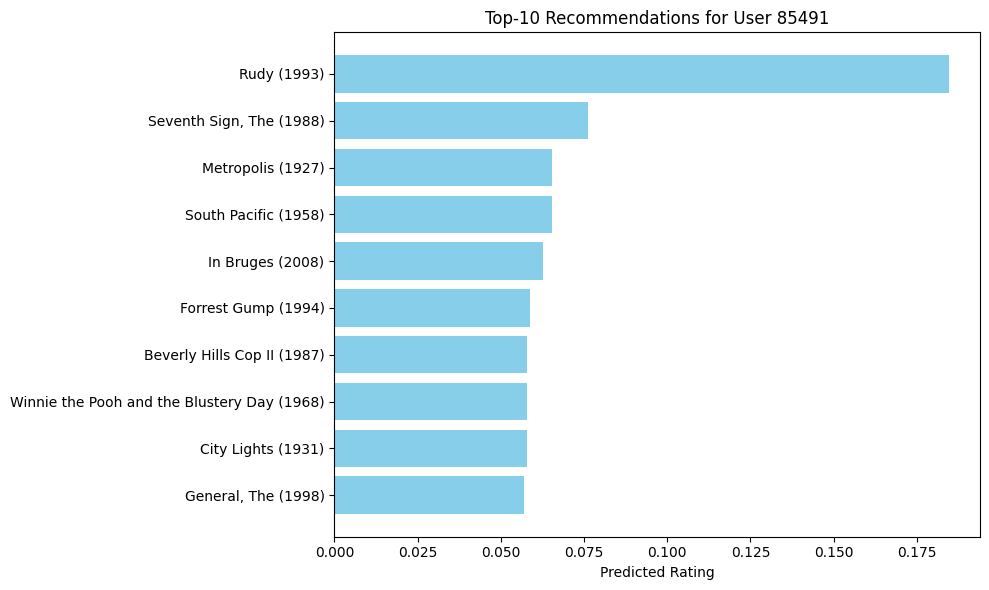

In [133]:
def visualize_user_recommendations(user_id, top_n=10):
    # Ambil skor kemiripan user (untuk pembobotan)
    sim_users = user_similarity_df[user_id].drop(user_id).sort_values(ascending=False)
    weighted_sum = np.dot(sim_users.values, train_matrix.loc[sim_users.index].values)
    sim_sum = np.sum(np.abs(sim_users.values))
    
    if sim_sum == 0:
        predicted_ratings = weighted_sum
    else:
        predicted_ratings = weighted_sum / sim_sum

    # Hindari film yang sudah ditonton
    user_seen = train_matrix.loc[user_id] > 0
    predicted_ratings[user_seen.values] = -np.inf

    # Ambil top-N hasil rekomendasi
    recommended_indices = np.argsort(predicted_ratings)[-top_n:][::-1]
    recommended_scores = predicted_ratings[recommended_indices]
    recommended_movie_ids = train_matrix.columns[recommended_indices]
    recommended_titles = movies_df[movies_df['movieId'].isin(recommended_movie_ids)][['movieId', 'title']]

    # Gabungkan untuk visualisasi
    recommendation_df = pd.DataFrame({
        'movieId': recommended_movie_ids,
        'predicted_rating': recommended_scores
    }).merge(recommended_titles, on='movieId', how='left')

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(recommendation_df['title'], recommendation_df['predicted_rating'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Predicted Rating')
    plt.title(f'Top-{top_n} Recommendations for User {user_id}')
    plt.tight_layout()
    plt.show()

visualize_user_recommendations(user_test[4], top_n=10)

Kode di atas bertujuan untuk membuat dan menjalankan fungsi `visualize_user_recommendations()`. Pertama, fungsi menghitung skor prediksi rating dengan menjumlahkan skor kemiripan pengguna lain dikalikan dengan rating mereka terhadap setiap film, lalu dibagi total kemiripan untuk normalisasi. Film yang sudah ditonton pengguna dihindari dengan mengganti skornya menjadi negatif tak hingga. Setelah itu, fungsi mengambil 10 film dengan skor prediksi tertinggi dan menampilkan judul serta nilai prediksi dalam bentuk grafik batang horizontal, memudahkan analisis apakah urutan rekomendasi sesuai dengan skor prediksi yang dihasilkan. oleh model mulai. Hal ini juga dapat mempermudah untuk menilai apakah urutan rekomendasi sudah sesuai dengan skor tertinggi dari kemiripan pengguna.

## Content-Based Filtering

/tmp/ipykernel_10/1479541340.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


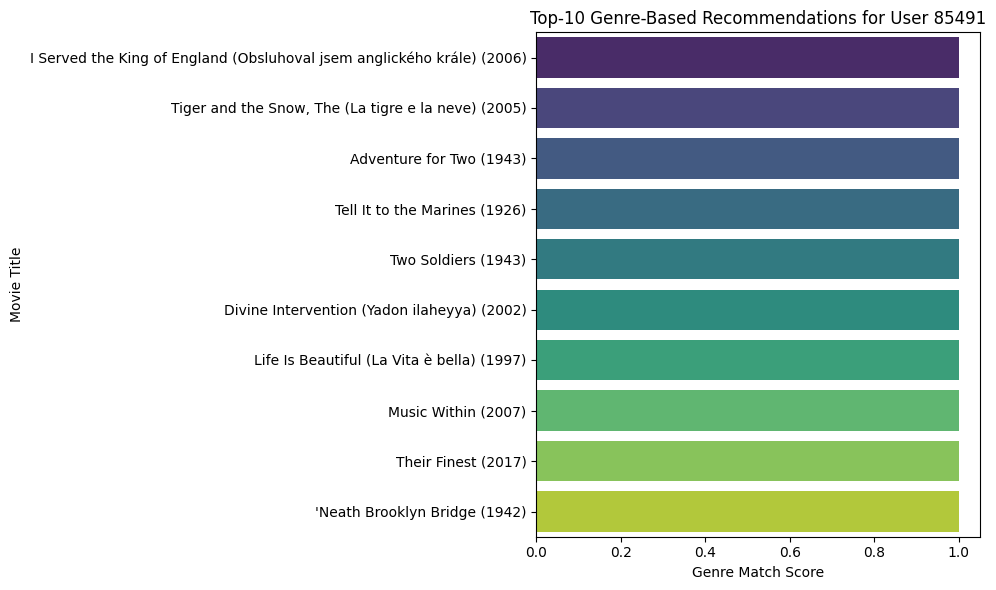

In [135]:
def visualize_genre_recommendations(user_id, ratings_df, top_n=10):
    # Dapatkan rekomendasi genre-based
    recommendations = recommendation_by_genre(user_id, ratings_df, top_n=top_n)

    if recommendations.empty:
        print(f"Tidak ada rekomendasi untuk user {user_id}.")
        return

    # Hitung skor genre untuk tiap film (untuk visualisasi urutan relevansi)
    user_rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()
    movie_genres = movies_df[movies_df['movieId'].isin(user_rated_movies)].copy()
    movie_genres['genres'] = movie_genres['genres'].fillna('').astype(str)

    user_genres = movie_genres['genres'].str.split('|')
    all_genres = [genre for sublist in user_genres for genre in sublist]
    favorite_genres = pd.Series(all_genres).value_counts().index.tolist()

    def genre_score(genres):
        genres_set = set(genres.split('|')) if isinstance(genres, str) else set()
        return len(genres_set & set(favorite_genres))

    recommendations['genre_score'] = recommendations['genres'].apply(genre_score)

    # Plot visualisasi
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='genre_score', 
        y='title', 
        data=recommendations.sort_values(by='genre_score', ascending=True),
        palette='viridis'
    )
    plt.xlabel("Genre Match Score")
    plt.ylabel("Movie Title")
    plt.title(f"Top-{top_n} Genre-Based Recommendations for User {user_id}")
    plt.tight_layout()
    plt.show()

visualize_genre_recommendations(user_test[4], test_data, top_n=10)

Kode di atas bertujuan untuk membuat dan menjalankan fungsi `visualize_genre_recommendations()` yang digunakan untuk memvisualisasikan hasil genre-based recommendation bagi seorang pengguna berdasarkan preferensi genre film yang telah mereka beri rating sebelumnya. Pertama, fungsi memanggil recommendation_by_genre untuk menghasilkan daftar rekomendasi film. Kemudian, genre dari film-film yang sudah diberi rating oleh pengguna diolah untuk menentukan genre yang paling sering muncul — diasumsikan sebagai genre favorit pengguna. Selanjutnya, setiap film rekomendasi diberi skor berdasarkan jumlah kecocokan antara genre film tersebut dan genre favorit pengguna. Visualisasi berupa bar chart horizontal menggambarkan genre match score dari setiap film rekomendasi, memperlihatkan urutan film dari yang paling tidak hingga paling sesuai dengan preferensi genre pengguna, sehingga memvalidasi bahwa sistem memberikan rekomendasi berdasarkan kemiripan genre.

# Inference

In [136]:
recommendation_by_user(user_test[4])

,movieId,title,genres
519,524,Rudy (1993),[Drama]
2172,2263,"Seventh Sign, The (1988)","[Drama, Fantasy, Thriller]"
1921,2010,Metropolis (1927),"[Drama, Sci-Fi]"
2849,2941,South Pacific (1958),"[Musical, Romance, War]"
12111,57669,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
351,356,Forrest Gump (1994),"[Comedy, Drama, Romance, War]"
3980,4084,Beverly Hills Cop II (1987),"[Action, Comedy, Crime, Thriller]"
1000,1023,Winnie the Pooh and the Blustery Day (1968),"[Animation, Children, Musical]"
3214,3307,City Lights (1931),"[Comedy, Drama, Romance]"
2334,2425,"General, The (1998)",[Crime]


Kode di atas bertujuan untuk melakukan proses inference guna melihat langsung daftar top-k film yang direkomendasikan pada salah satu user dengan memanggil fungsi `recommendation_by_user()` hasil dari Collaborative Filtering dengan parameternya adalah `userId` yang tersimpan pada variabel `sample_users`. Hasilnya data informasi film seperti movieId, title, dan genres disimpan pada sebuah dataframe sehingga lebih mudah dipahami.

In [138]:
recommendation_by_genre(user_test[4], test_data)

,movieId,title,genres
11959,56060,I Served the King of England (Obsluhoval jsem ...,"['Comedy', 'Drama', 'Romance', 'War']"
11073,48032,"Tiger and the Snow, The (La tigre e la neve) (...","['Comedy', 'Drama', 'Romance', 'War']"
19636,101950,Adventure for Two (1943),"['Comedy', 'Drama', 'Romance', 'War']"
12454,60225,Tell It to the Marines (1926),"['Comedy', 'Drama', 'Romance', 'War']"
53848,188263,Two Soldiers (1943),"['Comedy', 'Drama', 'Romance', 'War']"
5905,6017,Divine Intervention (Yadon ilaheyya) (2002),"['Comedy', 'Drama', 'Romance', 'War']"
2233,2324,Life Is Beautiful (La Vita è bella) (1997),"['Comedy', 'Drama', 'Romance', 'War']"
12531,60641,Music Within (2007),"['Comedy', 'Drama', 'Romance', 'War']"
45159,169756,Their Finest (2017),"['Comedy', 'Drama', 'Romance', 'War']"
39114,156469,'Neath Brooklyn Bridge (1942),"['Comedy', 'Drama', 'Romance', 'War']"


Kode di atas bertujuan untuk melakukan proses inference guna melihat langsung daftar top-k film yang direkomendasikan pada salah satu user dengan memanggil fungsi `recommendation_by_genre()` hasil dari perhitungan Content-Based Filtering dengan parameternya adalah `userId` yang tersimpan pada variabel `sample_users` dan test dataset. Hasilnya data informasi film seperti movieId, title, dan genres disimpan pada sebuah dataframe sehingga lebih mudah dipahami.